**Importing the Library**

In [193]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, average_precision_score, recall_score
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"



**Download Data From <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality" >UCI Machin learning</a>**

**Importing data from folder and store it into data frame**

In [194]:
df=pd.read_csv("winequality-white.csv")

**Exploratory Data Analysis**

In [195]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


**As we can see the above data is colon(;) separated**

In [196]:
df=pd.read_csv("winequality-white.csv", sep=";")

**Check the top 5 sample of the data frame , even we can check more by entering head(value), but by default it is 5**

In [197]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


***As we can see from above data set we can not find any information about dependent varibale quality type, so either we will check with tail value or putting more data in head(10)***

In [198]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


**By looking on above data we can easily find quality is the independent variable, So we will check how many wine quality we have in the data set**

In [199]:
df.groupby("quality").size()

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64

**We can find the shape of the dataset**

In [200]:
df.shape


(4898, 12)

In [201]:
df.size

58776

**By describing the data we can easily get the below information**

In [202]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Check for missing Value**

In [203]:
pd.isnull(df).any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

**Find the data type**

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


**As we can see from above dataset we have quality data set is numreic but actually its categorical data set and representing the wine quality, So we have to create categorical binning from wine quality data set**

In [205]:
bins=(2,5,6,9)
labels=[1,2,3]
df['quality_type']=pd.cut(df['quality'],bins=bins,labels=labels)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_type            4898 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 464.2 KB


**From above information we can see quality type is the categorical variable, so we need to convert it as float or int**

In [207]:
df['quality_type']=pd.to_numeric(df['quality_type'])

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
quality_type            4898 non-null int64
dtypes: float64(11), int64(2)
memory usage: 497.5 KB


In [209]:
df.groupby("quality_type").size()

quality_type
1    1640
2    2198
3    1060
dtype: int64

**Genrate the pandas profiling to visulaize the distrbution correletion and many things of the data**

In [210]:
import pandas_profiling
eda_report = pandas_profiling.ProfileReport(df)
eda_report.to_file("winequality-white.html")

**Split the dependent and independent varibale from the dataset**

In [211]:
X=df.drop(['quality','quality_type'],axis=1,inplace=False)

In [212]:
y=df['quality_type']

**Split the data into traing and test set**

In [213]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)

**Create the instance of suppot vector machine classifier and kernal is linear**

In [214]:
C = 0.001
clf = svm.SVC(kernel='linear', C=C)

In [215]:
clf

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [216]:
model=clf.fit(X_train,y_train)

In [217]:
y_pred=model.predict(X_test)

In [218]:
print("Model Accuracy :")
metrics.accuracy_score(y_test,y_pred)
print("Classification Report")
print(metrics.classification_report(y_test,y_pred,labels=None, target_names=None, sample_weight=None, digits=2))

Model Accuracy :


0.51428571428571423

Classification Report
              precision    recall  f1-score   support

           1       0.56      0.36      0.44       404
           2       0.50      0.84      0.63       574
           3       0.00      0.00      0.00       247

   micro avg       0.51      0.51      0.51      1225
   macro avg       0.35      0.40      0.36      1225
weighted avg       0.42      0.51      0.44      1225



C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confisusion Matrix


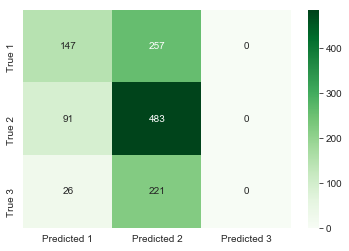

In [219]:
print("Confisusion Matrix")
cf=metrics.confusion_matrix(y_test,y_pred)
lbl1=["Predicted 1","Predicted 2","Predicted 3"]
lbl2=["True 1","True 2","True 3"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [220]:
print("Precision Score: \t {0:.2f}".format(precision_score(y_test, 
                                                           y_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.2f}".format(recall_score(y_test,
                                                     y_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.2f}".format(f1_score(y_test,
                                             y_pred, 
                                             average='weighted')))

Precision Score: 	 0.42
Recall Score: 		 0.51
F1 Score: 		 0.44


C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Scale the features**

In [221]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [222]:
C = 0.001
clf = svm.SVC(kernel='linear', C=C) #5
model=clf.fit(X_std_train, y_train)

In [223]:
y_pred=model.predict(sc_x.transform(X_test))

In [224]:
print("Model Accuracy :")
metrics.accuracy_score(y_test,y_pred)
print("Classification Report")
print(metrics.classification_report(y_test,y_pred,labels=None, target_names=None, sample_weight=None, digits=2))

Model Accuracy :


0.52000000000000002

Classification Report
              precision    recall  f1-score   support

           1       0.75      0.23      0.35       404
           2       0.49      0.95      0.65       574
           3       0.00      0.00      0.00       247

   micro avg       0.52      0.52      0.52      1225
   macro avg       0.42      0.39      0.33      1225
weighted avg       0.48      0.52      0.42      1225



C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confisusion Matrix


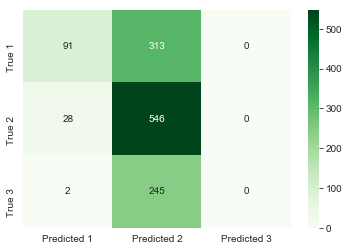

In [225]:
print("Confisusion Matrix")
cf=metrics.confusion_matrix(y_test,y_pred)
lbl1=["Predicted 1","Predicted 2","Predicted 3"]
lbl2=["True 1","True 2","True 3"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();

**poly**

In [226]:
C = 0.001
clf = svm.SVC(kernel='poly',degree=3, C=C)
model=clf.fit(X_std_train, y_train)

In [227]:
print("Model Accuracy :")
metrics.accuracy_score(y_test,y_pred)
print("Classification Report")
print(metrics.classification_report(y_test,y_pred,labels=None, target_names=None, sample_weight=None, digits=2))

Model Accuracy :


0.52000000000000002

Classification Report
              precision    recall  f1-score   support

           1       0.75      0.23      0.35       404
           2       0.49      0.95      0.65       574
           3       0.00      0.00      0.00       247

   micro avg       0.52      0.52      0.52      1225
   macro avg       0.42      0.39      0.33      1225
weighted avg       0.48      0.52      0.42      1225



C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confisusion Matrix


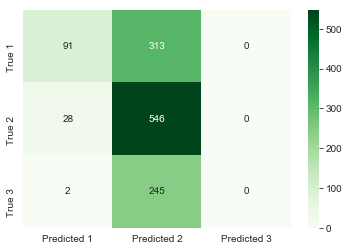

In [228]:
print("Confisusion Matrix")
cf=metrics.confusion_matrix(y_test,y_pred)
lbl1=["Predicted 1","Predicted 2","Predicted 3"]
lbl2=["True 1","True 2","True 3"]
sns.heatmap(cf,annot=True,cmap="Greens",fmt='d',xticklabels=lbl1,yticklabels=lbl2)
plt.show();

In [229]:
print("Precision Score: \t {0:.2f}".format(precision_score(y_test, 
                                                           y_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.2f}".format(recall_score(y_test,
                                                     y_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.2f}".format(f1_score(y_test,
                                             y_pred, 
                                             average='weighted')))

Precision Score: 	 0.48
Recall Score: 		 0.52
F1 Score: 		 0.42


C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\win10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**RBF and scaled features**

In [230]:
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

In [231]:
C = 1.0
clf = svm.SVC(kernel='rbf', gamma=0.7, C=C)
model=clf.fit(X_std_train, y_train)

**Cross Validation within Train Dataset**

In [232]:
res = cross_val_score(model, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

Average Accuracy: 	 0.6755
Accuracy SD: 		 0.0196


In [233]:
y_train_pred = cross_val_predict(model, X_std_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)

array([[ 756,  463,   17],
       [ 259, 1249,  116],
       [  28,  410,  375]], dtype=int64)

In [234]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.6676
Recall Score: 		 0.6480
F1 Score: 		 0.6438


**Cross Validation within Test Dataset**

In [235]:
y_test_pred = cross_val_predict(model, sc_x.transform(X_test), y_test, cv=3)
confusion_matrix(y_test, y_test_pred)

array([[152, 248,   4],
       [ 79, 466,  29],
       [  8, 179,  60]], dtype=int64)

In [236]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.5843
Recall Score: 		 0.5535
F1 Score: 		 0.5248


**Grid Search**

In [237]:
from sklearn.pipeline import Pipeline 

In [238]:
pipeline = Pipeline([('clf', svm.SVC(kernel='rbf', C=1, gamma=0.1))]) 

In [239]:
params = {'clf__C':(0.1, 0.5, 1, 2, 5, 10, 20), 
          'clf__gamma':(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)} 

In [240]:
svm_grid_rbf = GridSearchCV(pipeline, params, n_jobs=-1,
                            cv=3, verbose=1, scoring='accuracy') 

In [241]:
svm_grid_rbf.fit(X_train, y_train) 

Fitting 3 folds for each of 49 candidates, totalling 147 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 147 out of 147 | elapsed:   15.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('clf', SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'clf__C': (0.1, 0.5, 1, 2, 5, 10, 20), 'clf__gamma': (0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [242]:
svm_grid_rbf.best_score_

0.58017968962700794

In [243]:
best = svm_grid_rbf.best_estimator_.get_params() 

In [244]:
for k in sorted(params.keys()): 
    print('\t{0}: \t {1:.2f}'.format(k, best[k]))

	clf__C: 	 2.00
	clf__gamma: 	 0.25


In [245]:
y_test_pred = svm_grid_rbf.predict(X_test)

In [246]:
confusion_matrix(y_test, y_test_pred)
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                       y_test_pred, 
                                                       average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                               y_test_pred, 
                                               average='weighted')))

array([[205, 183,  16],
       [ 89, 432,  53],
       [ 17, 120, 110]], dtype=int64)

Precision Score: 	 0.6167
Recall Score: 		 0.6098
F1 Score: 		 0.6025
